In [5]:
import os
import keras
from keras.layers import BatchNormalization

train,test = keras.datasets.cifar10.load_data()

def preprocessing_x(x,flatten = True):
  x = x / 255
  if flatten:
    x = x.reshape((len(x),-1))
  return x

def preprocessing_y(y,num_classes=10):
  if y.shape[-1] == 1:
    y = keras.utils.to_categorical(y,num_classes)
  return y
x_train,y_train = train
x_test,y_test = test


x_train = preprocessing_x(x_train)
x_test = preprocessing_x(x_test)

y_train = preprocessing_y(y_train)
y_test = preprocessing_y(y_test)

def build_mlp(input_shape,output_units=10,num_neurons = [512,256,128]):
  input_layer = keras.layers.Input(input_shape)

  for i,n_units in enumerate(num_neurons):
    if i == 0:
      x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
      x = BatchNormalization()(x)
    else:
      x = keras.layers.Dense(units = n_units,activation = 'relu',name = 'hidden_layer'+str(i+1))(x)
      x = BatchNormalization()(x)

      out = keras.layers.Dense(units = output_units, activation='softmax',name='output')(x)
      model = keras.models.Model(inputs = [input_layer],outputs=[out])
      return model

learning_rate = 1e-3
epochs = 50
batch_size = 1024
momentum = 0.95

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_acc',patience=5,verbose=1)

model = build_mlp(input_shape = x_train.shape[1:])
model.summary()

optimizer = keras.optimizers.SGD(lr = learning_rate,nesterov = True,momentum=momentum)
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)

model.fit(x_train,y_train,epochs=epochs,batch_size = batch_size,validation_data = (x_test,y_test),shuffle=True,callbacks=[early_stop])














Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,710,346
Trainable params: 1,708,810
Non-trainable params: 1,536
_____________________________________________

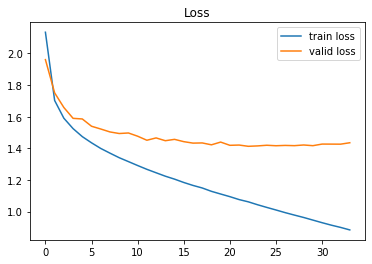

Text(0.5, 1.0, 'Accuracy')

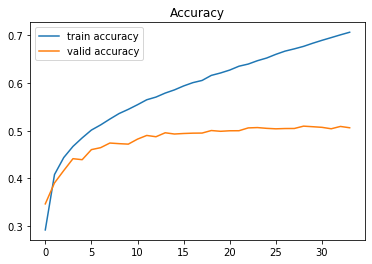

In [6]:
train_loss = model.history.history['loss']
valid_loss =  model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']


import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
